# Question 3

In [10]:
from qutip import *
import numpy as np
from matplotlib.colors import LinearSegmentedColormap, rgb2hex
#import kaleidoscope.qiskit
from kaleidoscope import bloch_sphere
from IPython.display import Image


## Parameters
Suggested input parameters from assignment question

In [11]:
p = 0.1
epsilon = 0.2
Delta = 1
N = 20
tau = np.pi/N
hbar = 1


Computational basis

In [12]:
zero_k=basis(2,0)
one_k=basis(2,1)
plus_k = (zero_k+one_k)/np.sqrt(2)
minus_k = (zero_k-one_k)/np.sqrt(2)


Initial density matrix, measurement operators, Hamiltonian and Unitary Operator for each time step. All unitary operators are equal as they are of equal length in the time domain.

In [13]:
rho0 = (1-p)*zero_k*zero_k.dag() + p*one_k*one_k.dag()

Mplus0 = np.sqrt(1/2+epsilon)*plus_k*plus_k.dag() + np.sqrt(1/2-epsilon)*minus_k*minus_k.dag()
Mplus1 = np.sqrt(1/2-epsilon)*plus_k*plus_k.dag() + np.sqrt(1/2+epsilon)*minus_k*minus_k.dag()

H = hbar*Delta*sigmay()
HH=-1j*tau*H/hbar
U = HH.expm()

## Functions
Mixed measure defines the outcome of a weak measurement. It combines the outcomes of each measurement into a mixed state weighted by the probabilities of each outcome. The function implements the following equation.
$$
\begin{align*}
\rho_M &= \Sigma_m \mathrm{Pr}(m)\rho_m\\
&= \Sigma_m \frac{M_m \rho M_m^\dagger}{\mathrm{Pr}(m)}\\
&= \Sigma_m M_m \rho M_m^\dagger
\end{align*}$$

In [14]:
def mixed_measure(rho: Qobj, M) -> Qobj:
    rhoM = Qobj()
    for Mm in M:
        rhoM += Mm*rho*Mm.dag()


    return rhoM

The following function returns a vector of the components of the position of a density operator on the Bloch sphere. The \(x,y,z\) components of the Cartesian coordinates are found by multiplying by the corresponding Pauli matrix \(\sigma_x,\sigma_y,\sigma_z\) and taking the Trace of the product.

In [15]:
def bloch_vec(rho: Qobj):
    b=Bloch()

    ss1=sigmax()*rho
    ss2=sigmay()*rho
    ss3=sigmaz()*rho
    return [ss1.tr().real,ss2.tr().real,ss3.tr().real]
   

## Simulation

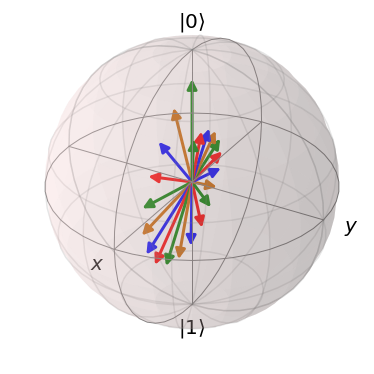

In [16]:
rhoN = rho0

points = [bloch_vec(rho0)]
for n in range(N):
    # evolve state by hamiltonian for time tau
    rhoN=U*rhoN*U.dag()
    # perform weak measurement on state
    rhoN = mixed_measure(rhoN,[Mplus0,Mplus1])
    
    #calculate Bloch sphere vector
    vecN = bloch_vec(rhoN)
    points.append(vecN)
b=Bloch()
b.add_vectors(points)
b.show()

## Better Plotting
The following code uses the Kaleidoscope package to create an interactive and customisable Bloch sphere for better understanding of the evolution and decoherence of the original state.

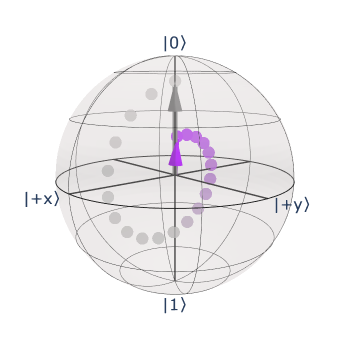

In [17]:
cm = LinearSegmentedColormap.from_list('graypurple', ["#999999", "#AA00FF"])
points_alpha = [np.linspace(0.8,1, len(points))]
points_color = [[rgb2hex(cm(kk)) for kk in np.linspace(-1,1,len(points))]]
vectors_color = ["#777777", "#AA00FF"]

betterB = bloch_sphere(points=points,
            vectors=[bloch_vec(rho0),bloch_vec(rhoN)],
            vectors_color=vectors_color,
            points_alpha=points_alpha,
            points_color=points_color)
# save figure after rotating axis
#betterB.show()
#betterB.savefig("bloch.png")
Image("bloch.png")

## Interpretation
There are two effects in play in creating the plot of the density operator; decoherence and evolution. The rotation by equal angles around the Bloch sphere is due to the unitary evolution from the Hamiltonian. As the Hamiltonian is defined by the Pauli y operator $\sigma_y$ the rotation is around the Bloch sphere's y-axis. The equal spacing of the angles is due to the equal evolution time at each time step $\tau$. The shrinking of the magnitude of the Bloch sphere vector is caused by the weak-measurement performed at each time step. This causes the state to decohere as the diagonal terms of the density matrix $\rho$ decrease.